# Survival Analysis :  Quick Implementation

In [1]:
#install import stuff, you need to login and give google permissions twice
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!pip install lifelines

/bin/bash: google-drive-ocamlfuse: command not found
     |████████████████████████████████| 348kB 9.3MB/s 


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#mount google drive
%cd
!mkdir -p drive
!google-drive-ocamlfuse drive

/root
/bin/bash: google-drive-ocamlfuse: command not found


In [36]:
#navigating your google drive and saving files inside.
%cd
%ls
%cd drive/
%mkdir ML_course_BII
#download model parameters
%ls -lh */
%ls -lh
%cd ML_course_BII
!wget https://www.dropbox.com/s/w001nnym90esujf/Customer_churn.zip?dl=0 -O Customer_churn.zip
!unzip Customer_churn.zip
%cd Customer_churn
%ls -lh


/root
drive/
/root/drive
github_fromXA/:
total 8.0K
drwxr-xr-x 3 root root 4.0K Oct 13 13:31 ML_course_BII/
drwxr-xr-x 2 root root 4.0K Oct 13 13:25 Survival-Analysis-Lifelines/

ML_course_BII/:
total 0
total 8.0K
drwxr-xr-x 4 root root 4.0K Oct 13 13:31 github_fromXA/
drwxr-xr-x 2 root root 4.0K Oct 13 13:32 ML_course_BII/
/root/drive/ML_course_BII
--2019-10-13 13:32:10--  https://www.dropbox.com/s/w001nnym90esujf/Customer_churn.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w001nnym90esujf/Customer_churn.zip [following]
--2019-10-13 13:32:10--  https://www.dropbox.com/s/raw/w001nnym90esujf/Customer_churn.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc51ea3fac887be4b20bea049d3a.dl.dropboxusercontent.co

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns',60)
pd.set_option('display.max_rows', 60)
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


### We will be using Telco Customer Churn data from IBM Watson Analytics
https://www.ibm.com/communities/analytics/watson-analytics-blog/Telco-Customer-Churn/

In [0]:
##  create a dataframe
df = pd.read_excel("./WA_Fn-UseC_-Telco-Customer-Churn.xlsx") 

In [7]:
'''data description

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, 
online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, 
paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

'''

'data description\n\nCustomers who left within the last month – the column is called Churn\n\nServices that each customer has signed up for – phone, multiple lines, internet, \nonline security, online backup, device protection, tech support, and streaming TV and movies\n\nCustomer account information – how long they’ve been a customer, contract, payment method, \npaperless billing, monthly charges, and total charges\n\nDemographic info about customers – gender, age range, and if they have partners and dependents\n\n'

In [9]:
## Have a first look at the data
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [10]:
#get all columns
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#view churn column , row 2 - 17 #python index starts from 0
df['Churn'].iloc[1:17]

1      No
2     Yes
3      No
4     Yes
5     Yes
6      No
7      No
8     Yes
9      No
10     No
11     No
12     No
13    Yes
14     No
15     No
16     No
Name: Churn, dtype: object

In [12]:
#percentage of churn customers
np.mean(df['Churn']=='Yes')

0.2653698707936959

In [13]:
# unique entries of tech support
pd.unique(df['TechSupport'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
# access churn column from those who are on Tech support
df[df['TechSupport']=='Yes']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3     7795-CFOCW    Male              0      No         No      45   
8     7892-POOKP  Female              0     Yes         No      28   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
18    4190-MFLUW  Female              0     Yes        Yes      10   
23    3638-WEABW  Female              0     Yes         No      58   
24    6322-HRPFA    Male              0     Yes        Yes      49   
28    5248-YGIJN    Male              0     Yes         No      72   
30    3841-NFECX  Female              1     Yes         No      71   
32    6827-IEAUQ  Female              0     Yes        Yes      27   
35    6234-RAAPL  Female              0     Yes        Yes      72   
43    4671-VJLCL  Female              0      No         No      63   
44    4080-IIARD  Female              0     Yes         No      13   
48    7639-LIAYI    Male              0      No         No      52   
49    2954-PIBKO  Female              0     Yes        Yes      69   
52    6575-SUVOI  Female              1     Yes         No      25   
54    4667-QONEA  Female              1     Yes        Yes      60   
57    5067-XJQFU    Male              1     Yes        Yes      66   
59    5954-BDFSG  Female              0      No         No      72   
63    0557-ASKVU  Female              0     Yes        Yes      18   
65    5122-CYFXA  Female              0      No         No       3   
67    3410-YOQBQ  Female              0      No         No      31   
70    2273-QCKXA    Male              0      No         No       1   
72    1891-QRQSA    Male              1     Yes        Yes      64   
74    5630-AHZIL  Female              0      No        Yes       3   
83    9919-YLNNG  Female              0      No         No      42   
91    2424-WVHPL    Male              1      No         No       1   
92    7233-PAHHL    Male              0     Yes        Yes      66   
96    9803-FTJCG    Male              0     Yes        Yes      71   
102   7123-WQUHX    Male              0      No         No      38   
...          ...     ...            ...     ...        ...     ...   
6948  2750-BJLSB  Female              0      No         No      47   
6949  3648-GZPHF    Male              0     Yes        Yes      32   
6956  2451-YMUXS    Male              1      No         No      67   
6957  3914-FDRHP    Male              0      No         No       9   
6964  1264-FUHCX  Female              0     Yes         No      49   
6965  7789-CRUVC  Female              1     Yes         No      61   
6971  7240-FQLHE  Female              1     Yes         No      18   
6972  6664-FPDAC  Female              1      No         No      56   
6973  9972-VAFJJ  Female              1     Yes         No      53   
6978  6439-PKTRR  Female              0     Yes        Yes      70   
6981  5568-DMXZS  Female              0      No         No       8   
6982  8468-FZTOE  Female              0     Yes        Yes      72   
6983  6633-SYEUS  Female              0      No         No      23   
6985  6967-PEJLL    Male              0     Yes        Yes      37   
6986  3976-BWUCK  Female              0     Yes         No      30   
6988  1684-FLBGS  Female              0     Yes        Yes      23   
6995  7164-BPTUT    Male              0      No        Yes      57   
6996  4174-LPGTI  Female              0     Yes        Yes      41   
7002  9586-JGQKH  Female              0     Yes         No      64   
7003  4501-VCPFK    Male              0      No         No      26   
7007  2274-XUATA    Male              1     Yes         No      72   
7011  5482-NUPNA  Female              0      No         No       4   
7012  6691-CCIHA  Female              0     Yes         No      62   
7021  1699-HPSBG    Male              0      No         No      12   
7025  2823-LKABH  Female              0      No         No      18   
7027  0550-DCXLH

In [0]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=(df['Churn']=='Yes')*1

type of contract: Month-to-month


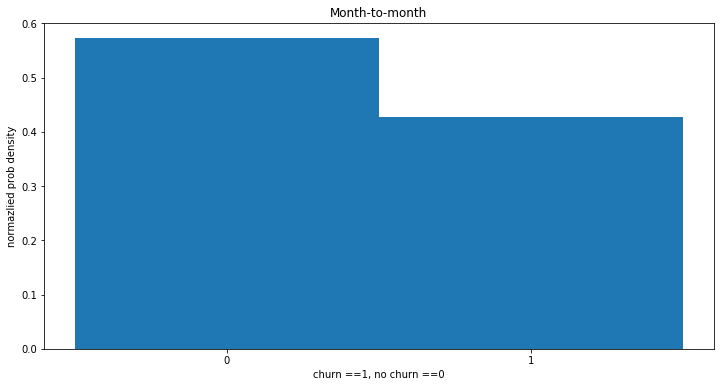

type of contract: One year


type of contract: Two year


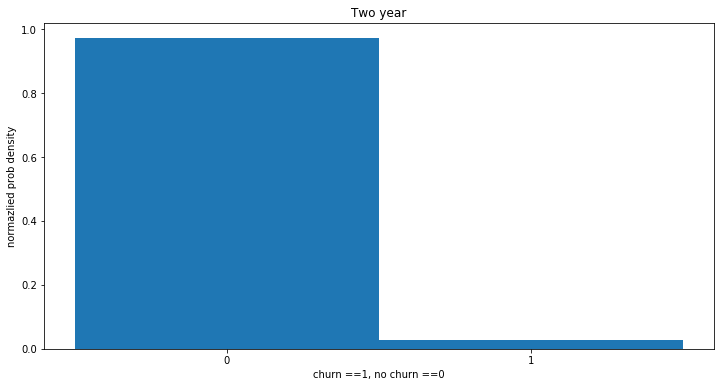

In [16]:

for i in pd.unique(df['Contract']):
    print ('type of contract:',i)
    plt.hist(df[df['Contract']==i]['Churn'],density=True,bins=(0,1,2))
    plt.xticks([0.5,1.5],labels=[0,1])
    plt.xlabel('churn ==1, no churn ==0')
    plt.ylabel('normazlied prob density')
    plt.title(i)
    plt.show()

In [17]:
#checking column for missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

In [18]:
#customers with missing values, fill in with median
df[df['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)           52.55           NaN      0  
753                Mailed check           20.25           NaN      0  
936                Mailed check           80.85           NaN      0  
1082               Mailed check           25.75           NaN      0  
1340    Credit card (automatic)           56.05           NaN      0  
3331               Mailed check           19.85 

In [0]:
## Impute the null value with the median value
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [0]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [21]:
## lets have a look at the categories and their distribution in all the categorical columns.

for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

In [22]:
print ('all variables:',df.keys())
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

all variables: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [0]:
df_processed = pd.get_dummies(df[variables])

In [24]:
df_processed.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85              1   
1              0      34           56.95       1889.50              0   
2              0       2           53.85        108.15              0   
3              0      45           42.30       1840.75              0   
4              0       2           70.70        151.65              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0            0           0            1              1               0   
1            1           1            0              1               0   
2            1           1            0              1               0   
3            1           1            0              1               0   
4            0           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1                 1   
2                0                 1                 1   
3                1                 0                 0   
4                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_N

In [0]:
from sklearn import tree
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = pd.get_dummies(df_processed,drop_first=False) #explanatory variables
y = df['Churn'] #variable to predict

X_train, X_test, y_train, y_test = train_test_split(     
                            X, y, test_size=0.2, random_state=2)


#define descision tree
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy',min_samples_leaf=25)

# train model
clf = clf.fit(X_train, y_train)


In [27]:
# getting predictions, (each row gives negative and positive class probabilities)
clf.predict_proba(X_test)[:5]

array([[0.71098266, 0.28901734],
       [0.71098266, 0.28901734],
       [0.96058854, 0.03941146],
       [0.85507246, 0.14492754],
       [0.71098266, 0.28901734]])

In [28]:
# get predictions and performance 
y_test_pred = clf.predict_proba(X_test)[:,1]
y_train_pred = clf.predict_proba(X_train)[:,1]
print ('train,test roc:',metrics.roc_auc_score(y_train,y_train_pred),metrics.roc_auc_score(y_test,y_test_pred))

train,test roc: 0.7930680498149498 0.7755018579306012


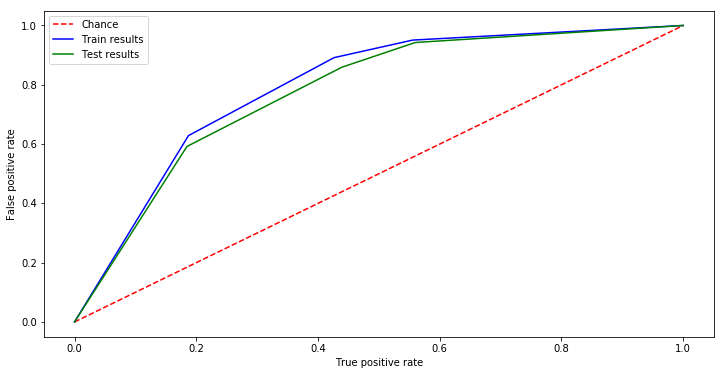

In [29]:
#print ROC curve
fpr, tpr, thresholds  = metrics.roc_curve(y_train,y_train_pred)
plt.plot([0,1],[0,1],'r--',label='Chance')
plt.plot(fpr,tpr,'b',label='Train results')
fpr, tpr, thresholds  = metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr,'g',label='Test results')

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [30]:
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn",format='png') 
graph

In [38]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Explain.png'))
plt.show()

train,test roc: 0.8421102858066332 0.8191645812343593


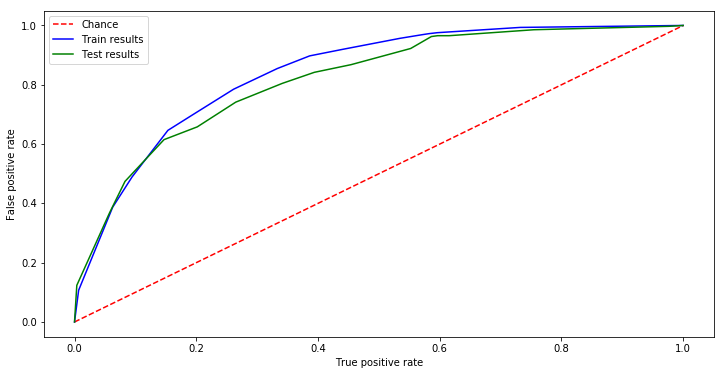

In [39]:
#making a more complicated model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_leaf=25)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:,1]
y_train_pred = clf.predict_proba(X_train)[:,1]
print ('train,test roc:',metrics.roc_auc_score(y_train,y_train_pred),metrics.roc_auc_score(y_test,y_test_pred))
fpr, tpr, thresholds  = metrics.roc_curve(y_train,y_train_pred)
plt.plot([0,1],[0,1],'r--',label='Chance')
plt.plot(fpr,tpr,'b',label='Train results')
fpr, tpr, thresholds  = metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr,'g',label='Test results')

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

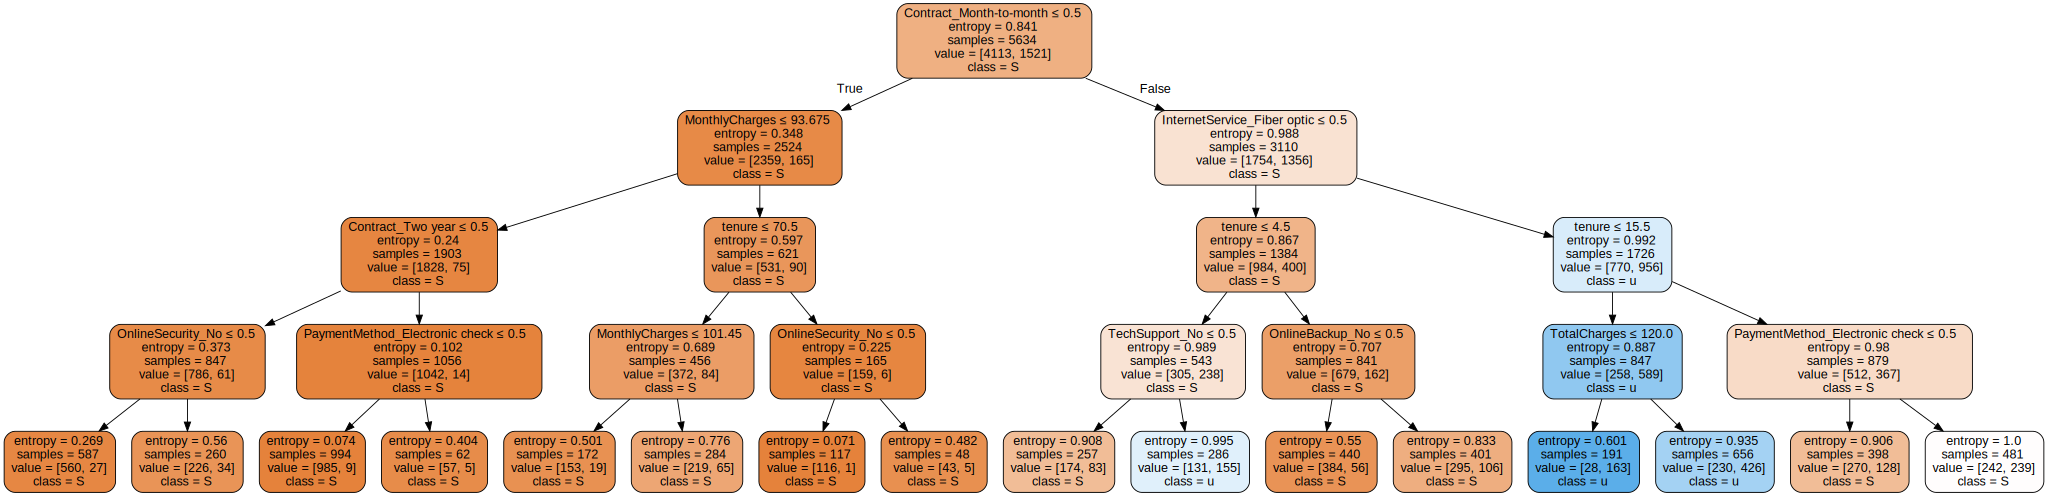

In [40]:
import graphviz 
import pydot

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.keys(),  
                      class_names="Survived",  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn",format='png') 
graph

# Stradegies to reduce churn

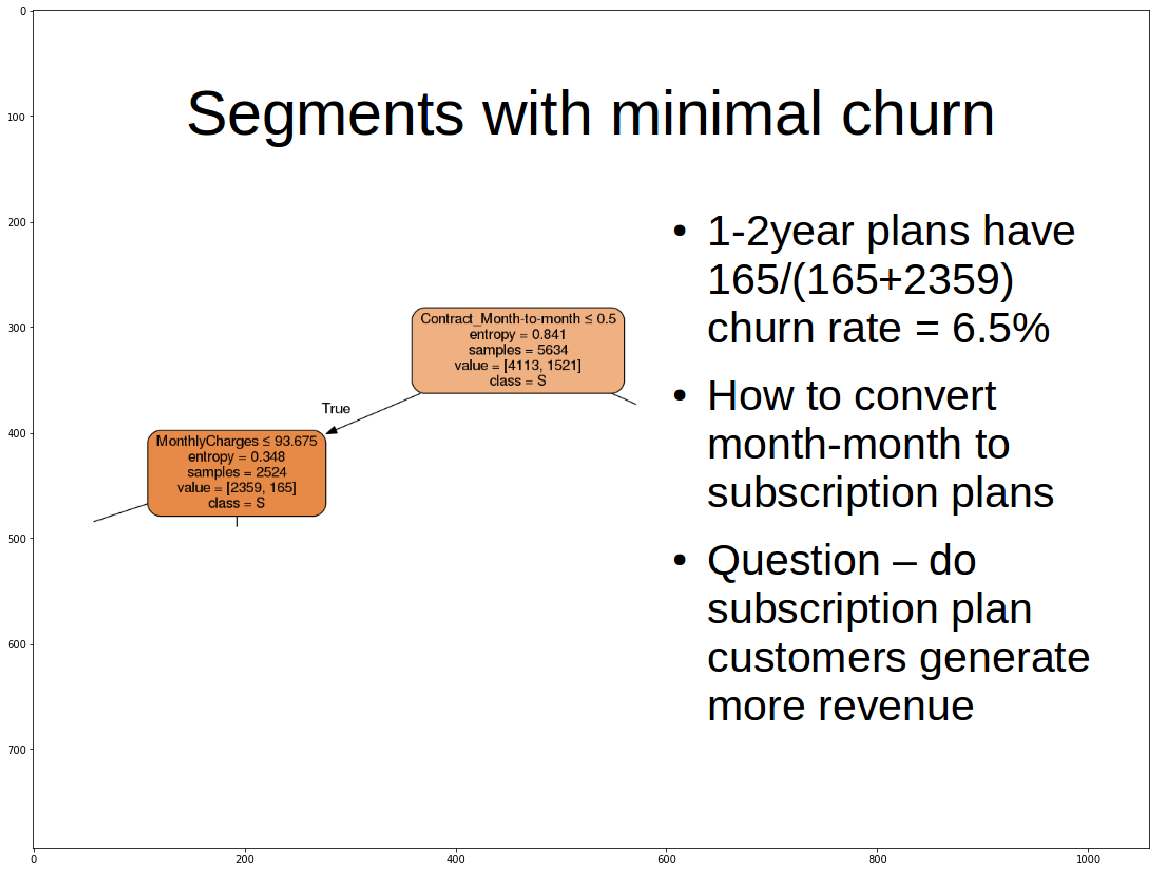

In [41]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Recommendation1.png'))
plt.show()

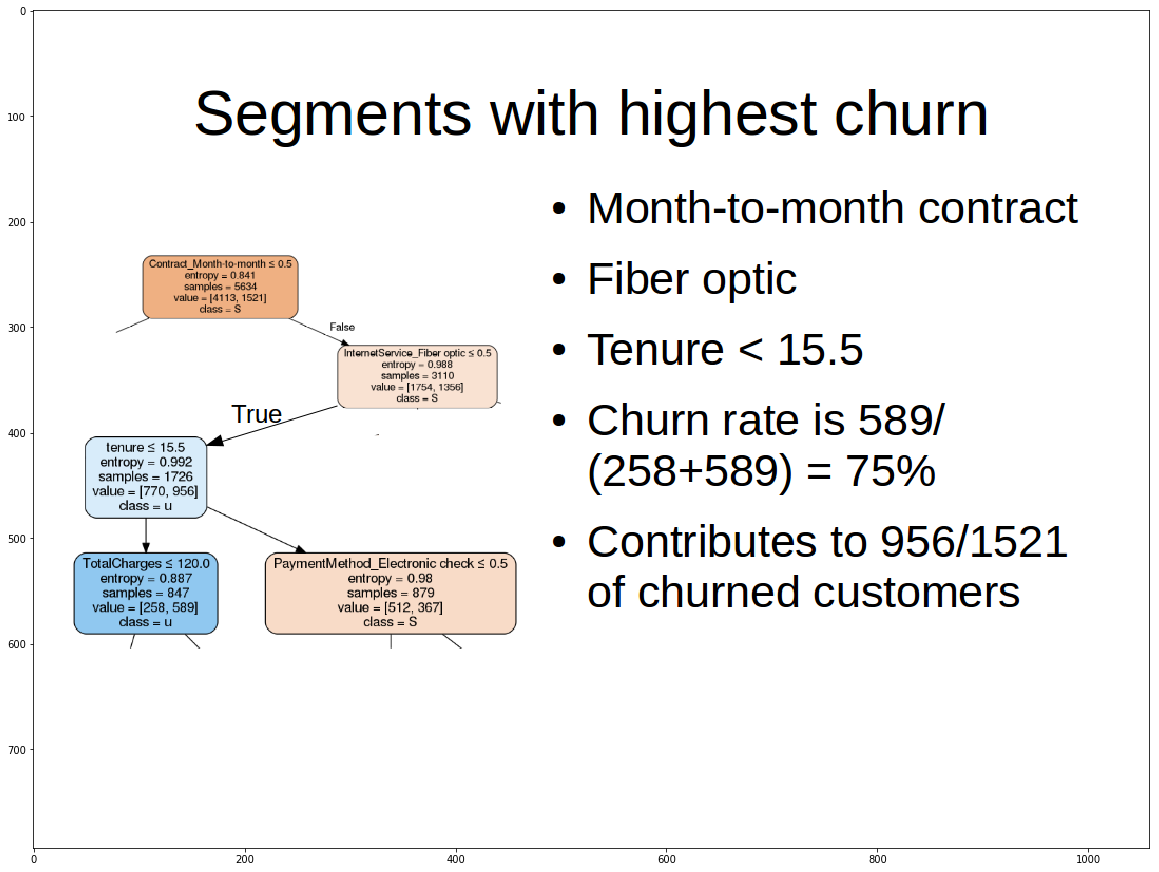

In [42]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Recommendation2.png'))
plt.show()

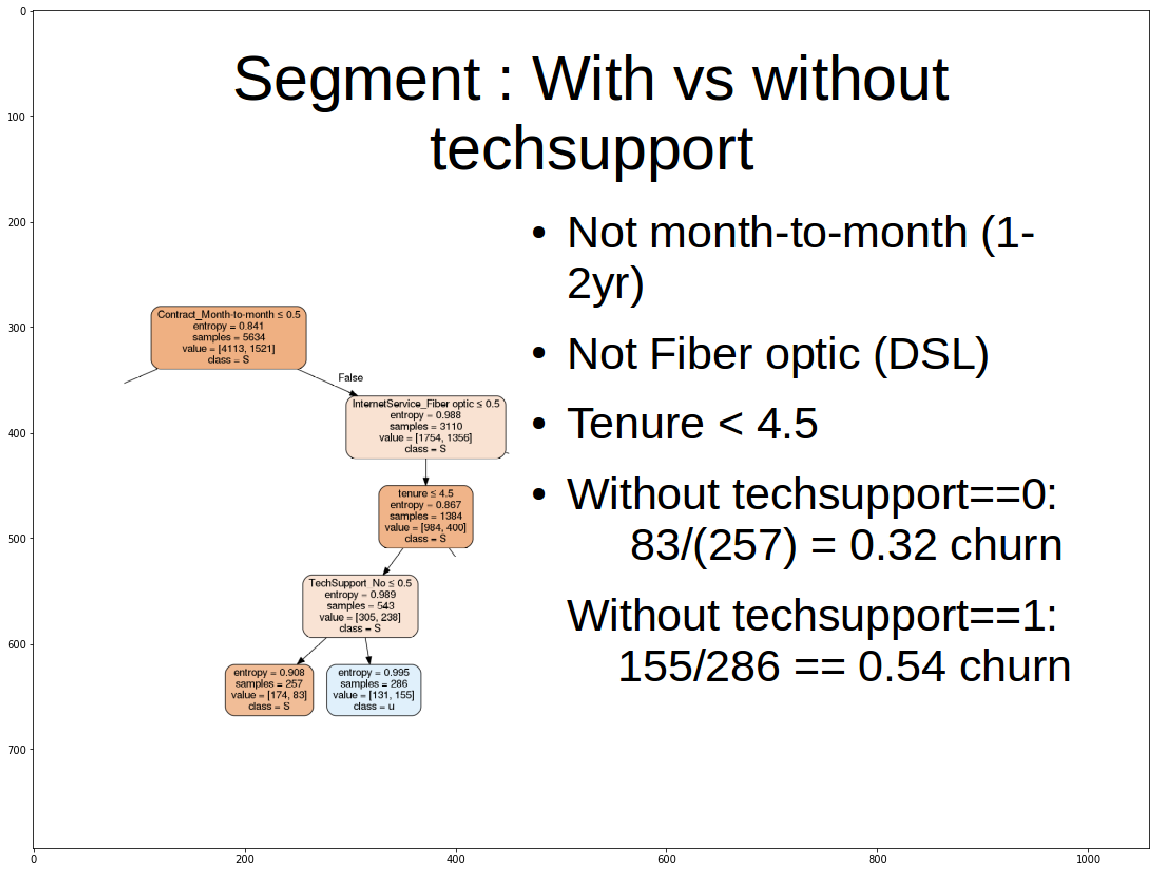

In [43]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(plt.imread('./Recommendation3.png'))
plt.show()